In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\Neural networks\Neural networks\Alphabets_data.csv")

In [6]:
# Basic exploration
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
print("Class Distribution:\n", df['letter'].value_counts())

Dataset Shape: (20000, 17)
Columns: Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')
Missing values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64
Class Distribution:
 letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [8]:
# Separate features and target
X = df.drop('letter', axis=1)
y = df['letter']

In [9]:
# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [13]:
# Convert labels to one-hot
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [14]:
# Basic ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2767 - loss: 2.5760 - val_accuracy: 0.6925 - val_loss: 1.1559
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7085 - loss: 1.0391 - val_accuracy: 0.7681 - val_loss: 0.8347
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7683 - loss: 0.8010 - val_accuracy: 0.7916 - val_loss: 0.7257
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8007 - loss: 0.6877 - val_accuracy: 0.8169 - val_loss: 0.6418
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8224 - loss: 0.6046 - val_accuracy: 0.8278 - val_loss: 0.5921
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8377 - loss: 0.5377 - val_accuracy: 0.8422 - val_loss: 0.5362
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8584 - loss: 0.4787 - val_accuracy: 0.8525 - val_loss: 0.4960
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8630 - loss: 0.4583 - val_accurac

In [17]:
! pip install scikeras


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def create_model(hidden_layers=1, neurons=64, activation='relu', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    verbose=2
)

# Use y_train (not one-hot)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=128; total time=  27.5s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=128; total time=  25.5s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=128; total time=  33.8s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__hidden_layers=1, model__learning_rate=0.1, model__neurons=32; total time=  33.6s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__hidden_layers=1, model__learning_rate=0.1, model__neurons=32; total time=  26.5s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__hidden_layers=1, model__learning_rate=0.1, model__neurons=32; total time=  27.3s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__learning_rate=0.1, model__neurons=64; total time=  30.3s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__learning_rate=0.1, model__neurons=64; total time=  31.6s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__learning_rate=0.1, model__neurons=64; total time=  30.8s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=32; total time=  29.5s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=32; total time=  28.7s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=32; total time=  25.4s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=tanh, model__hidden_layers=3, model__learning_rate=0.01, model__neurons=128; total time=  28.4s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=tanh, model__hidden_layers=3, model__learning_rate=0.01, model__neurons=128; total time=  28.5s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=tanh, model__hidden_layers=3, model__learning_rate=0.01, model__neurons=128; total time=  29.3s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__learning_rate=0.001, model__neurons=32; total time=  28.1s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__learning_rate=0.001, model__neurons=32; total time=  27.6s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__learning_rate=0.001, model__neurons=32; total time=  41.9s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=1, model__learning_rate=0.1, model__neurons=64; total time=  32.7s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=1, model__learning_rate=0.1, model__neurons=64; total time=  26.2s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=1, model__learning_rate=0.1, model__neurons=64; total time=  29.0s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=64; total time=  37.5s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=64; total time=  31.8s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=64; total time=  32.2s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__activation=tanh, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=64; total time=  15.4s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__activation=tanh, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=64; total time=  16.7s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=20, model__activation=tanh, model__hidden_layers=2, model__learning_rate=0.01, model__neurons=64; total time=  15.9s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.1, model__neurons=128; total time=  26.1s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.1, model__neurons=128; total time=  25.8s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, epochs=30, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.1, model__neurons=128; total time=  24.8s


c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(model=<function create_model at 0x0000026060E0E020>, verbose=0),
                   param_distributions={'batch_size': [32, 64],
                                        'epochs': [20, 30],
                                        'model__activation': ['relu', 'tanh'],
                                        'model__hidden_layers': [1, 2, 3],
                                        'model__learning_rate': [0.001, 0.01,
                                                                 0.1],
                                        'model__neurons': [32, 64, 128]},
                   scoring='accuracy', verbose=2)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate tuned model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_labels = y_pred  # Already class labels

print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

# Accuracy Comparison
default_model = KerasClassifier(model=create_model, verbose=0)
default_model.fit(X_train, y_train)

default_pred = default_model.predict(X_test)
default_acc = accuracy_score(y_test, default_pred)
print(f"Default Accuracy: {default_acc:.4f}")

tuned_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"Tuned Accuracy: {tuned_acc:.4f}")

print(f"\nDefault Accuracy: {default_acc:.4f}")
print(f"Tuned Accuracy: {tuned_acc:.4f}")


Classification Report:

              precision    recall  f1-score   support

           A       0.97      0.99      0.98       158
           B       0.93      0.90      0.91       153
           C       0.95      1.00      0.98       147
           D       0.97      0.94      0.95       161
           E       0.94      0.97      0.95       154
           F       0.95      0.94      0.94       155
           G       0.99      0.92      0.95       155
           H       0.88      0.97      0.92       147
           I       0.93      0.95      0.94       151
           J       0.99      0.92      0.95       149
           K       0.88      0.98      0.93       148
           L       0.99      0.97      0.98       152
           M       0.99      0.97      0.98       158
           N       0.99      0.94      0.96       157
           O       0.97      0.93      0.95       150
           P       0.99      0.99      0.99       161
           Q       0.98      0.99      0.98       157
   

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Default Accuracy: 0.6805
Tuned Accuracy: 0.9593

Default Accuracy: 0.6805
Tuned Accuracy: 0.9593


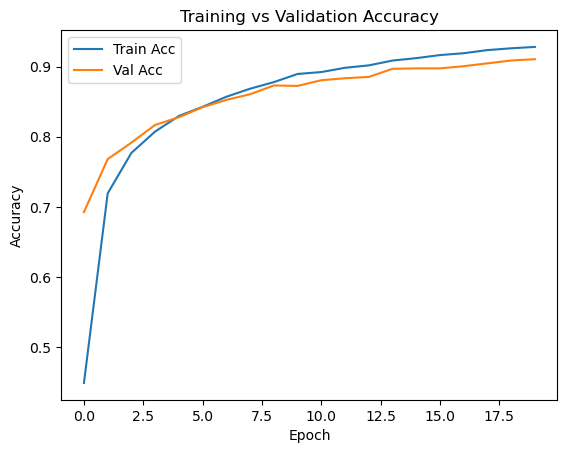

In [30]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
